In [2]:
##############################
# Date: 2026-02-05           #
# Author: 민세홍              #
##############################


# 설치된 폰트 리스트를 보는 기능
# matplotlib에 있는 font_manger는 현재 시스템에서 설치된 폰트리스트를 가져오기 위한 기능
import matplotlib.font_manager as fm
print([f.name for f in fm.fontManager.ttflist])

['DejaVu Serif', 'cmmi10', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmex10', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif Display', 'cmr10', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXNonUnicode', 'cmsy10', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmss10', 'STIXSizeFourSym', 'STIXSizeOneSym', 'cmtt10', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Display', 'STIXSizeThreeSym', 'cmb10', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'Gadugi', 'Eras Demi ITC', 'Goudy Old Style', 'HCR Batang Ext', 'Courier New', 'Lucida Handwriting', 'Batang', 'Gadugi', 'Verdana', 'Times New Roman', 'NewJumja', 'Papyrus', 'Blackadder ITC', 'Rockwell', 'Lucida Sans', 'Segoe UI', 'New Gulim', 'Microsoft New Tai Lue', 'Tw Cen MT', 'Franklin Gothic Heavy', 'Lucida Sans', 'Bodoni MT', 'MS Gothic', 'Berlin Sans FB Demi', 'Goudy S

In [1]:
#설치된 폰트 리스트를 보는 기능
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 설치된 폰트 중 한글 이름 또는 영어 이름을 보기 위한 출력
for f in fm.fontManager.ttflist:
    if "Gothic" in f.name or "Malgun" in f.name or "Nanum" in f.name or "Apple" in f.name:
        print(f.name, "|", f.fname)

# Windows 설치 기반 폰트 지정
# 리눅스 일 경우 리눅스에 맞게 sys.platform을 변경해야 함
import sys
if sys.platform == "win32":
    plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


Franklin Gothic Heavy | C:\Windows\Fonts\FRAHV.TTF
MS Gothic | C:\Windows\Fonts\msgothic.ttc
Malgun Gothic | C:\Windows\Fonts\malgunsl.ttf
Yu Gothic | C:\Windows\Fonts\YuGothB.ttc
HYGothic-Medium | C:\Windows\Fonts\H2GTRM.TTF
Malgun Gothic | C:\Windows\Fonts\malgunbd.ttf
Hancom Gothic | C:\Windows\Fonts\Hancom Gothic Regular.ttf
Franklin Gothic Medium | C:\Windows\Fonts\framd.ttf
Showcard Gothic | C:\Windows\Fonts\SHOWG.TTF
HYGothic-Extra | C:\Windows\Fonts\H2GTRE.TTF
Franklin Gothic Demi | C:\Windows\Fonts\FRADM.TTF
BIZ UDGothic | C:\Windows\Fonts\BIZ-UDGothicR.ttc
Malgun Gothic | C:\Windows\Fonts\malgun.ttf
Century Gothic | C:\Windows\Fonts\GOTHICB.TTF
Yu Gothic | C:\Windows\Fonts\YuGothL.ttc
Hancom Gothic | C:\Windows\Fonts\Hancom Gothic Bold.ttf
BIZ UDGothic | C:\Windows\Fonts\BIZ-UDGothicB.ttc
Franklin Gothic Medium Cond | C:\Windows\Fonts\FRAMDCN.TTF
Yu Gothic | C:\Windows\Fonts\YuGothM.ttc
Franklin Gothic Book | C:\Windows\Fonts\FRABK.TTF
Copperplate Gothic Bold | C:\Windows\Fon

# Human in the loop: 참조 기반 실시간 범용 객체 분할

여러 이미지에서 "이게 그 물체다"라고 드래그로 지정한 참조를 **모아두고**,  
새 이미지에서 그 참조로 같은 물체를 찾아 SAM3로 분할하는 서비스 형태입니다.

- **참조 추가**: 이미지에서 박스를 그려 참조로 등록 (임베딩으로 저장, 실시간 평균 갱신)
- **분할 실행**: 새 이미지에서 참조 임베딩과 유사한 영역을 찾아 박스 프롬프트로 SAM3 분할

In [2]:
##############################
# Date: 2026-02-05           #
# Author: 민세홍              #
##############################

import os
import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import sam3
from sam3 import build_sam3_image_model
from sam3.model.sam3_image_processor import Sam3Processor
from sam3.visualization_utils import plot_results

sam3_root = os.path.join(os.path.dirname(sam3.__file__), "..")
sam3_pkg = os.path.dirname(sam3.__file__)
bpe_path = os.path.join(sam3_pkg, "assets", "bpe_simple_vocab_16e6.txt.gz")

import glob


# 한글 폰트: 프로젝트 assets/fonts 폴더 사용
import glob
import matplotlib.font_manager as fm
_fonts_dir = os.path.join(sam3_root, "assets", "fonts")
_font_files = []
for ext in ("*.ttf", "*.otf", "*.ttc"):
    _font_files.extend(glob.glob(os.path.join(_fonts_dir, ext)))
if _font_files:
    _font_path = _font_files[0]
    _font_name = fm.FontProperties(fname=_font_path).get_name()
    fe = fm.FontEntry(fname=_font_path, name=_font_name)
    fm.fontManager.ttflist.insert(0, fe)
    plt.rcParams["font.family"] = _font_name
    print(f"폰트 사용: {_font_name} ({os.path.basename(_font_path)})")
else:
    plt.rcParams["font.family"] = "Malgun Gothic"
    print("assets/fonts에 폰트 없음, 기본 폰트 사용")
plt.rcParams["axes.unicode_minus"] = False

C:\Users\rebel\sam3\sam3\model_builder.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


폰트 사용: Cafe24 Ssurround (Cafe24Ssurround-v2.0.ttf)


In [3]:
##############################
# Date: 2026-02-05           #
# Author: 민세홍              #
##############################

#torch 사용 디바이스 설정
#cuda (NVIDIA RTX GPU)를 사용할 경우 GPU 사용, 아닐 시 CPU 사용으로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
_device_str = "cuda" if device.type == "cuda" else "cpu"

#만약 NIVIDIA GPU를 사용할 경우 부동 소수 정밀도 32비트 사용
# float32 -> bfloat16 형태로 오토 캐스팅.
if device.type == "cuda":
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()

model = build_sam3_image_model(bpe_path=bpe_path, device=_device_str)
processor = Sam3Processor(model, device=_device_str)
print("Model and processor ready.")

Model and processor ready.


## 참조 저장소 (ReferenceBank)

여러 이미지에서 참조한 crop들의 임베딩을 모아 평균으로 갱신하는 용도
실시간 업데이트: 새 예시가 올 때마다 평균만 다시 계산.


!!!!!!!!!!!!! 분석이 필요함

In [4]:
# DINOv2로 crop 임베딩 추출 (참조용). 첫 실행 시 모델 다운로드.
DINOV2_MEAN = (0.485, 0.456, 0.406)
DINOV2_STD = (0.229, 0.224, 0.225)
CROP_SIZE = 224

def load_dinov2(device):
    model = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14", pretrained=True)
    model.eval()
    return model.to(device)

@torch.no_grad()
def get_crop_embedding(pil_image, box_xyxy, encoder, device):
    """박스 영역을 crop해서 임베딩 벡터로 반환. box_xyxy = (x1,y1,x2,y2) 픽셀."""
    x1, y1, x2, y2 = [int(round(x)) for x in box_xyxy]
    crop = pil_image.crop((x1, y1, x2, y2))
    crop = crop.resize((CROP_SIZE, CROP_SIZE), Image.BILINEAR)
    arr = np.array(crop).astype(np.float32) / 255.0
    for i in range(3):
        arr[..., i] = (arr[..., i] - DINOV2_MEAN[i]) / DINOV2_STD[i]
    t = torch.from_numpy(arr).permute(2, 0, 1).unsqueeze(0).float().to(device)
    feat = encoder(t)
    return feat.squeeze(0).cpu().numpy()

class ReferenceBank:
    """참조 crop 임베딩을 모아 평균으로 실시간 갱신."""
    def __init__(self, encoder, device, max_refs=50):
        self.encoder = encoder
        self.device = device
        self.max_refs = max_refs
        self.embeddings = []
        self._mean = None

    def add(self, pil_image, box_xyxy):
        emb = get_crop_embedding(pil_image, box_xyxy, self.encoder, self.device)
        self.embeddings.append(emb)
        if len(self.embeddings) > self.max_refs:
            self.embeddings.pop(0)
        self._mean = None
        return len(self.embeddings)

    def get_query_embedding(self):
        if not self.embeddings:
            return None
        if self._mean is None:
            self._mean = np.stack(self.embeddings, axis=0).mean(axis=0)
        return self._mean

    def clear(self):
        self.embeddings.clear()
        self._mean = None

In [5]:
encoder = load_dinov2(device)
ref_bank = ReferenceBank(encoder, device, max_refs=50)
print("Reference bank ready. Add references with ref_bank.add(pil_image, (x1,y1,x2,y2)).")

Using cache found in C:\Users\rebel/.cache\torch\hub\facebookresearch_dinov2_main
C:\Users\rebel/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
C:\Users\rebel/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
C:\Users\rebel/.cache\torch\hub\facebookresearch_dinov2_main\dinov2\layers\block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


Reference bank ready. Add references with ref_bank.add(pil_image, (x1,y1,x2,y2)).


## 새 이미지에서 참조와 가장 유사한 영역 찾기 (박스 반환)

이미지를 격자로 잘라 각 영역의 임베딩을 구한 뒤, 참조 평균 임베딩과 유사도가 최대인 위치를 박스로 반환


!!!!!코사인 유사도 이해 필요.<br/>
@torch.no_grad()에 대한 이해 필요

In [6]:
### 이미지 너비 계산.

def xyxy_to_cxcywh_normalized(x1, y1, x2, y2, img_w, img_h):
    """픽셀 xyxy -> [0,1] 정규화 cx, cy, w, h (add_geometric_prompt 형식)."""
    cx = (x1 + x2) / 2.0 / img_w
    cy = (y1 + y2) / 2.0 / img_h
    w = (x2 - x1) / img_w
    h = (y2 - y1) / img_h
    return [cx, cy, w, h]

@torch.no_grad()
def find_best_box(pil_image, ref_embedding, encoder, device, stride=112, box_margin=0.1):
    """
    이미지에서 ref_embedding과 코사인 유사도가 최대인 224x224 영역을 찾아
    그 주변으로 margin을 준 박스 (x1,y1,x2,y2) 픽셀 반환.
    """
    ref = torch.from_numpy(ref_embedding).float().to(device)
    ref = F.normalize(ref.unsqueeze(0), dim=1)
    w, h = pil_image.size
    best_sim = -1.0
    best_x1 = best_y1 = best_x2 = best_y2 = 0
    for y in range(0, max(1, h - CROP_SIZE + 1), stride):
        for x in range(0, max(1, w - CROP_SIZE + 1), stride):
            x2 = min(x + CROP_SIZE, w)
            y2 = min(y + CROP_SIZE, h)
            crop = pil_image.crop((x, y, x2, y2))
            crop = crop.resize((CROP_SIZE, CROP_SIZE), Image.BILINEAR)
            arr = np.array(crop).astype(np.float32) / 255.0
            for i in range(3):
                arr[..., i] = (arr[..., i] - DINOV2_MEAN[i]) / DINOV2_STD[i]
            t = torch.from_numpy(arr).permute(2, 0, 1).unsqueeze(0).float().to(device)
            feat = encoder(t)
            feat = F.normalize(feat, dim=1)
            sim = (feat @ ref.T).item()
            if sim > best_sim:
                best_sim = sim
                best_x1, best_y1, best_x2, best_y2 = x, y, x2, y2
    # margin: 박스를 약간 키움
    dw = int((best_x2 - best_x1) * box_margin)
    dh = int((best_y2 - best_y1) * box_margin)
    x1 = max(0, best_x1 - dw)
    y1 = max(0, best_y1 - dh)
    x2 = min(w, best_x2 + dw)
    y2 = min(h, best_y2 + dh)
    return (x1, y1, x2, y2)

## 참조로 새 이미지 분할 (segment_with_reference)

참조가 비어 있으면 None. 있으면 참조 평균 임베딩으로 best box를 찾고, 그 박스를 SAM3 geometric prompt로 넣어 분할합니다.

In [20]:
def segment_with_reference(processor, pil_image, ref_bank, encoder, device):
    """참조가 있으면 best box로 SAM3 분할, 없으면 None."""
    ref_emb = ref_bank.get_query_embedding()
    if ref_emb is None:
        print("참조가 없습니다. 먼저 참조를 추가하세요.")
        return None
    state = processor.set_image(pil_image)
    x1, y1, x2, y2 = find_best_box(pil_image, ref_emb, encoder, device)
    img_w, img_h = pil_image.size
    box_cxcywh = xyxy_to_cxcywh_normalized(x1, y1, x2, y2, img_w, img_h)
    state = processor.add_geometric_prompt(box=box_cxcywh, label=True, state=state)
    return state

## 1) 참조 추가: 이미지에서 박스 그려서 등록

아래에서 `ref_image`를 열고, 다음 셀에서 박스를 그리면 해당 영역이 참조로 추가됩니다.

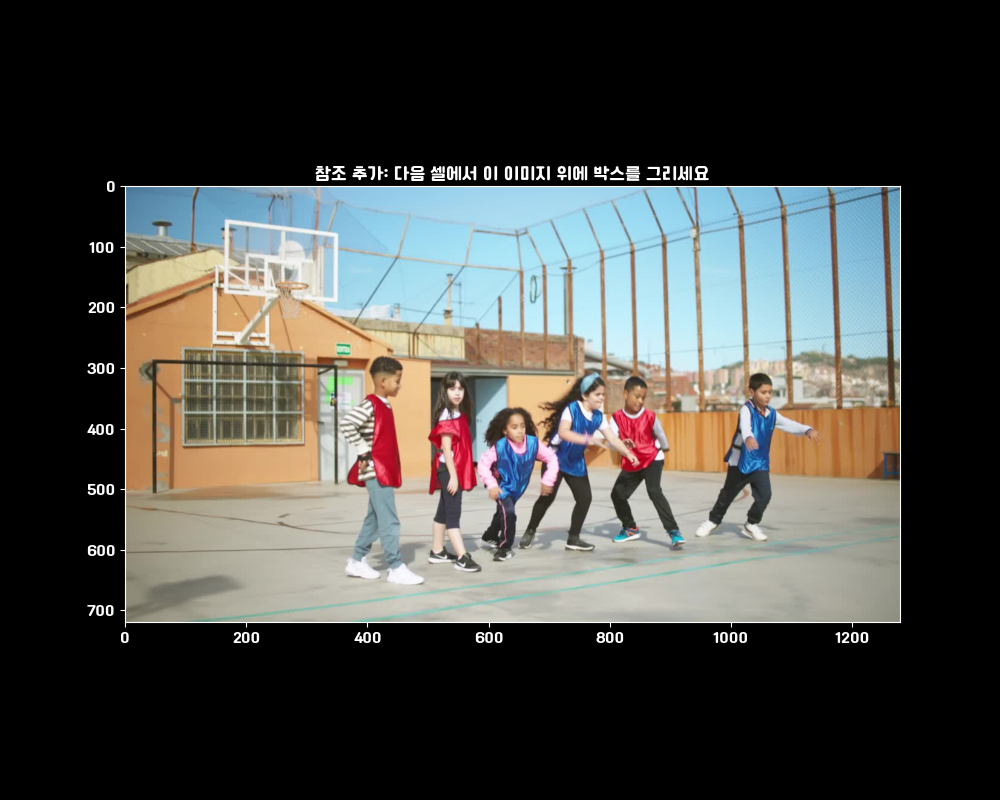

In [23]:
# 참조로 쓸 이미지 로드 (경로만 바꾸면 됨)
ref_image_path = f"{sam3_root}/assets/images/test_image.jpg"
ref_image = Image.open(ref_image_path).convert("RGB")
plt.figure(figsize=(10, 8))
plt.imshow(ref_image)
plt.axis("on")
plt.title("참조 추가: 다음 셀에서 이 이미지 위에 박스를 그리세요")
plt.show()

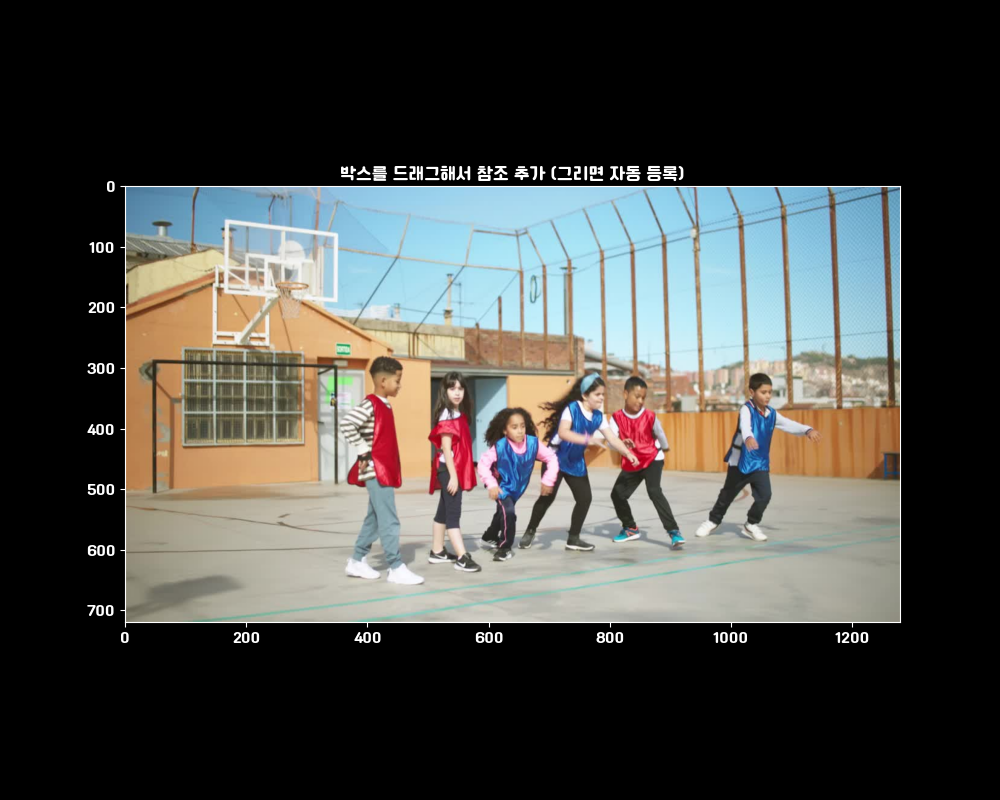

In [24]:
# 위 이미지에서 드래그로 박스를 그리면 참조로 추가됩니다.
%matplotlib widget
from matplotlib.widgets import RectangleSelector

_last_box = []

def on_select(eclick, erelease):
    x1, x2 = min(eclick.xdata, erelease.xdata), max(eclick.xdata, erelease.xdata)
    y1, y2 = min(eclick.ydata, erelease.ydata), max(eclick.ydata, erelease.ydata)
    w, h = ref_image.size
    x1, x2 = max(0, min(x1, w)), max(0, min(x2, w))
    y1, y2 = max(0, min(y1, h)), max(0, min(y2, h))
    if x2 - x1 < 5 or y2 - y1 < 5:
        return
    _last_box[:] = [x1, y1, x2, y2]
    n = ref_bank.add(ref_image, (x1, y1, x2, y2))
    print(f"참조 추가됨 (총 {n}개): box=(x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f})")

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(ref_image)
ax.set_title("박스를 드래그해서 참조 추가 (그리면 자동 등록)")
rs = RectangleSelector(ax, on_select, useblit=True, button=[1], minspanx=5, minspany=5)
plt.show()

## 2) 새 이미지에서 참조로 분할

참조를 1개 이상 추가한 뒤, 아래에서 분할할 이미지를 로드하고 `segment_with_reference`로 분할한 결과를 봅니다.

참조가 없습니다. 먼저 참조를 추가하세요.


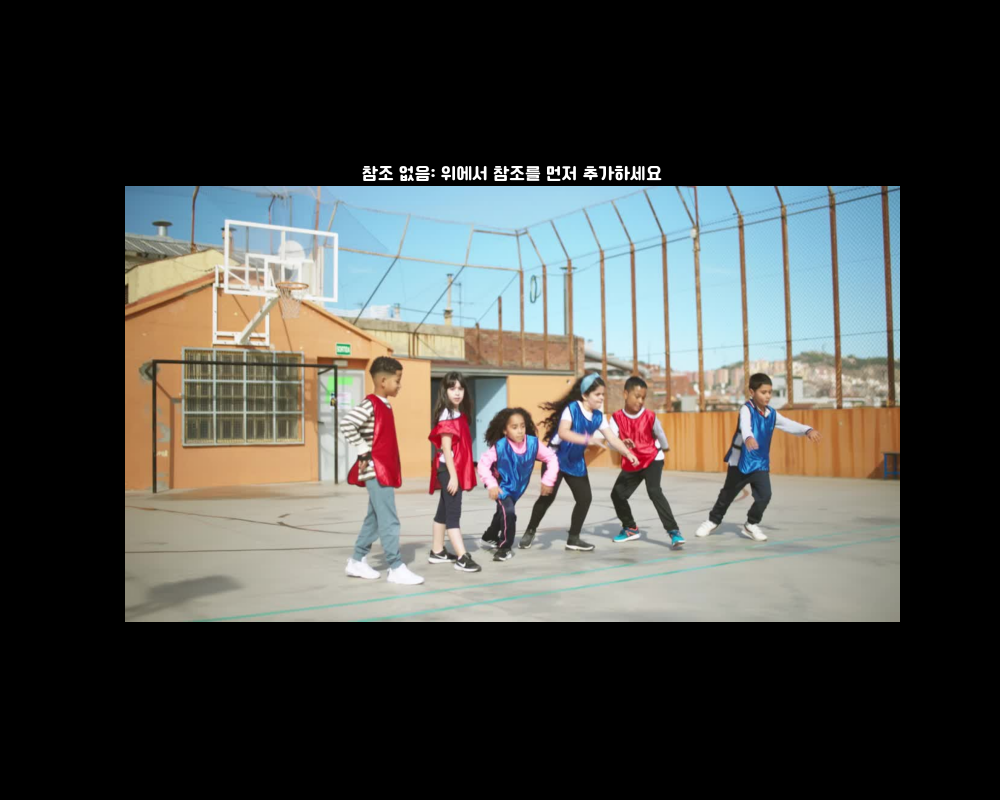

In [30]:
# 분할할 이미지 테스트 로드 (같은 이미지 또는 다른 이미지)
target_image_path = f"{sam3_root}/assets/images/test_image.jpg"
target_image = Image.open(target_image_path).convert("RGB")

state = segment_with_reference(processor, target_image, ref_bank, encoder, device)
if state is not None:
    plot_results(target_image, state)
else:
    plt.figure(figsize=(10, 8))
    plt.imshow(target_image)
    plt.title("참조 없음: 위에서 참조를 먼저 추가하세요")
    plt.axis("off")
    plt.show()

## (선택) 참조 초기화

다른 물체로 참조를 새로 모으고 싶을 때 실행하세요.

In [29]:
ref_bank.clear()
print("참조가 비워졌습니다.")

참조가 비워졌습니다.
